In [1]:
import os
import pandas as pd
from pathlib import Path
from data.prepare import Dataset
from models.models import SegNet, PSPNet, UNet, DeepLab, ImageSegmentation
from models.predict import show_predictions, create_mask, predict
from models.train import (
    train_segnet,
    train_deeplab,
    train_pspnet,
    train_unet,
    train,
    train_segmentation
)
from visualization.image import display
from data.augmentation import DataAugmentation


In [4]:
def test():
    # ROOT_DIR = Path(__file__).parent.parent
    ROOT_DIR = "./../"
    dataset = Dataset(root_dir=ROOT_DIR,
                      batch_size=1, validation=True)

    train_dataset, _, test_dataset = dataset.make()

    for image in train_dataset.take(10):
        display([image[0][0], image[1][0]])


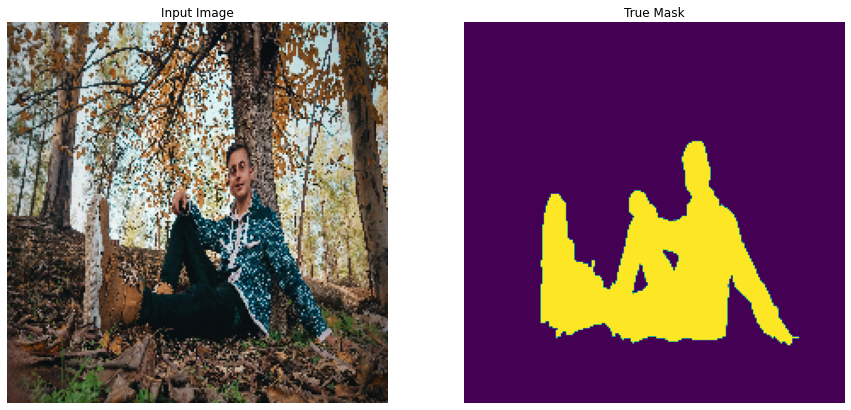

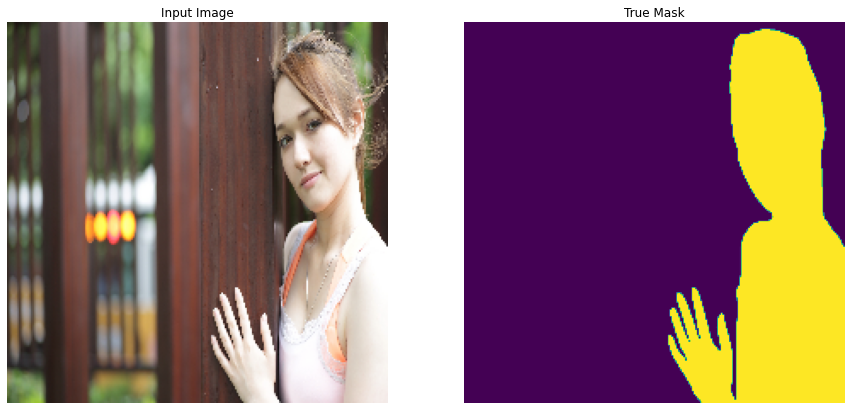

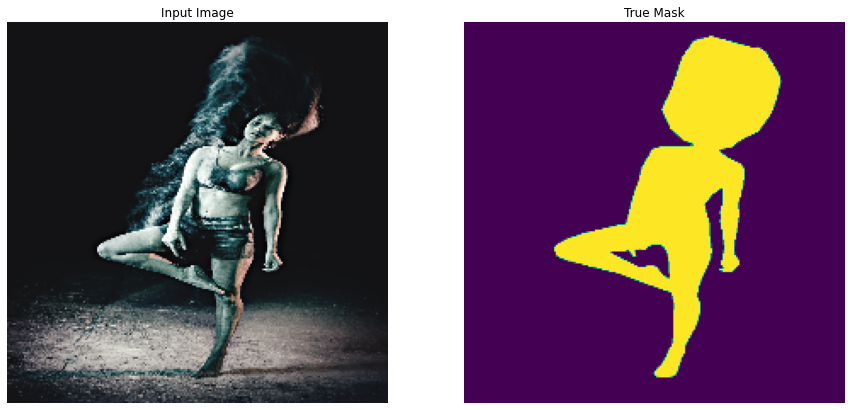

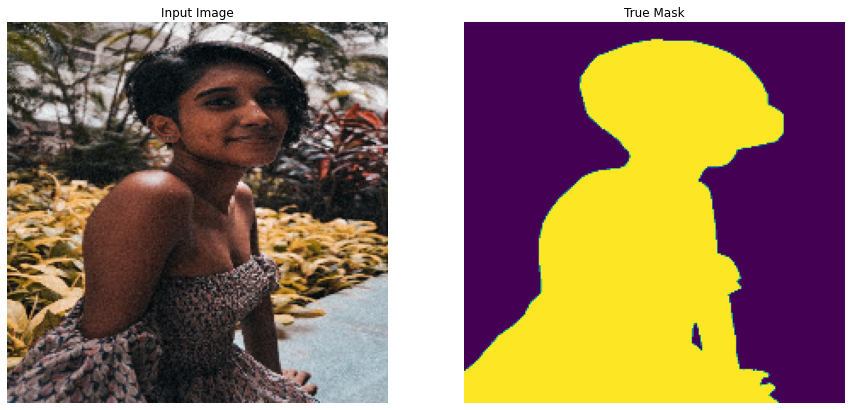

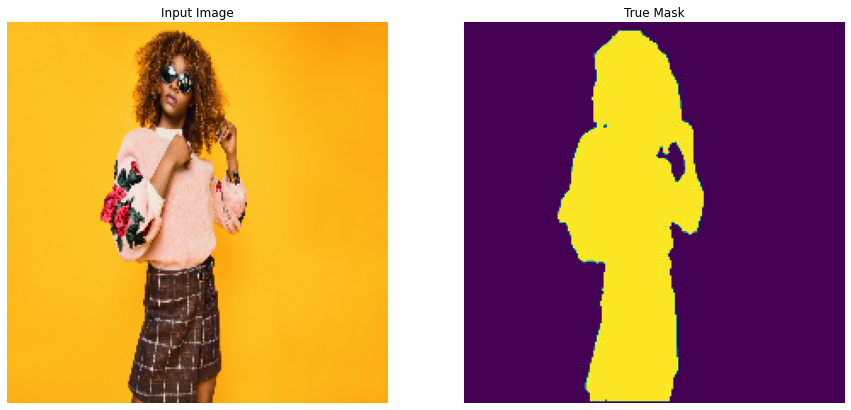

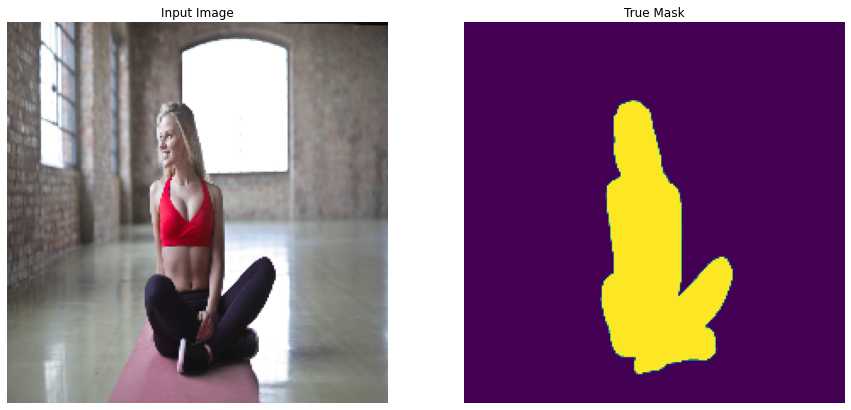

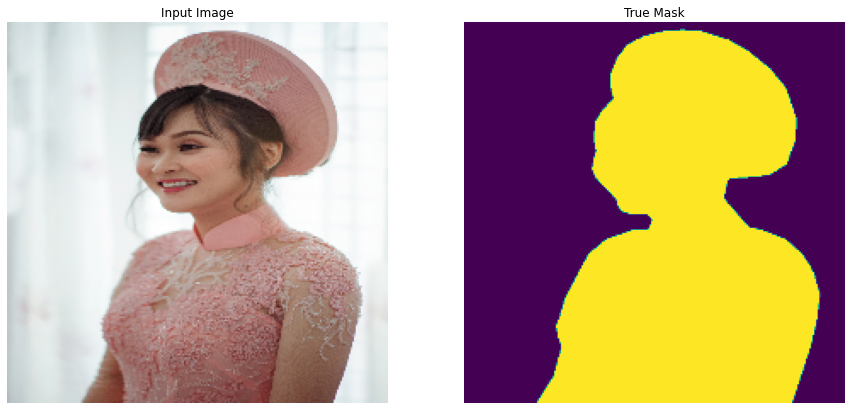

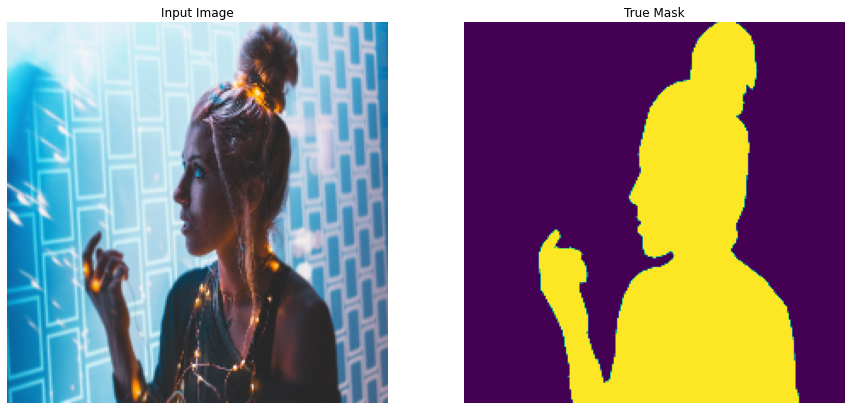

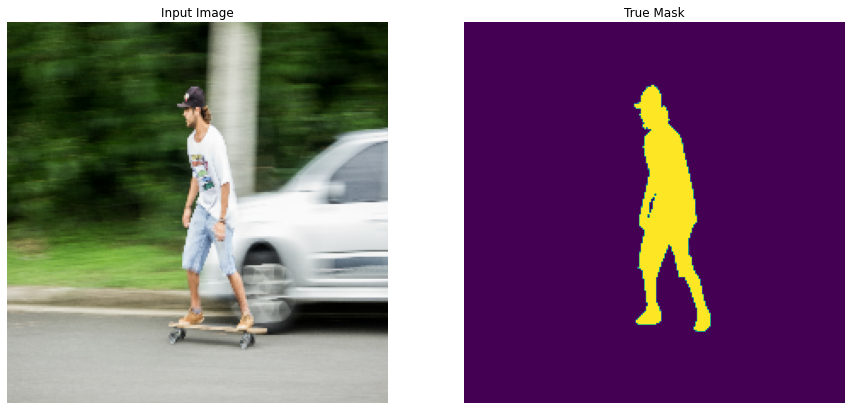

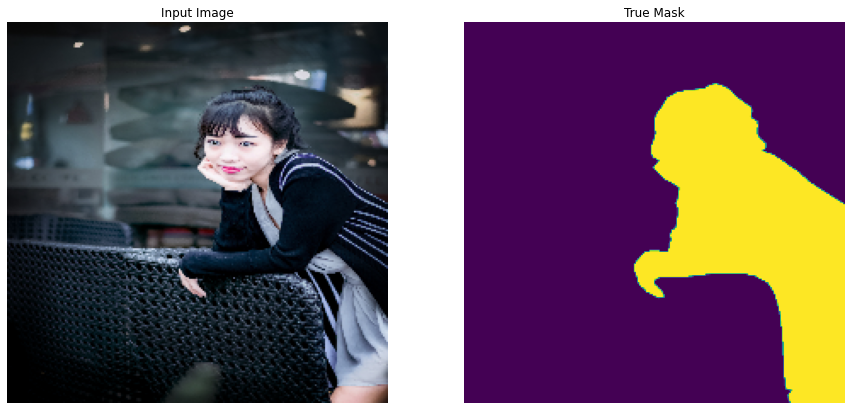

In [5]:
test()

In [3]:
 ROOT_DIR = "./../"
dataset = Dataset(root_dir=ROOT_DIR,
                      batch_size=1, validation=False)

In [4]:
train_images, test_images,train_masks, test_masks = dataset.split_data()

In [5]:
gnrtr = dataset.prepare_dataset(train_images, train_masks)

In [6]:
gnrtr

<generator object Dataset.prepare_dataset at 0x000001A15DF1D900>

In [7]:
# next(gnrtr)
augment = DataAugmentation(rotation_range=4, vertical_shift=4,
                                       horizontal_shift=4, zoom_range=(0.2, 0.2), shear_intensity=2, subset_size=0.90)

In [8]:
augment.apply(gnrtr)

AttributeError: 'generator' object has no attribute 'shape'

In [9]:
dataset = dataset.make()

In [10]:
dataset = dataset[0]

In [11]:
dataset

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 224, 224, 1)), types: (tf.float32, tf.float32)>

In [14]:
augment = DataAugmentation(rotation_range=4, vertical_shift=4,
                                       horizontal_shift=4, zoom_range=(0.2, 0.2), shear_intensity=2, subset_size=0.90)

In [14]:
for image in dataset.take(1):
    plt.imshow(image[0][0])
    # display([image[0][0], image[1][0]])

InvalidArgumentError: TypeError: Can't mix strings and bytes in path components
Traceback (most recent call last):

  File "C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 891, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "e:\ML Projects\ImageSegmentation\src\data\prepare.py", line 75, in prepare_dataset
    image_path = os.path.join(

  File "C:\ProgramData\Anaconda3\envs\tf\lib\ntpath.py", line 117, in join
    genericpath._check_arg_types('join', path, *paths)

  File "C:\ProgramData\Anaconda3\envs\tf\lib\genericpath.py", line 155, in _check_arg_types
    raise TypeError("Can't mix strings and bytes in path components") from None

TypeError: Can't mix strings and bytes in path components


	 [[{{node PyFunc}}]]